In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
base_dir = "/home/dermot.kelly/Dermot_analysis/Phd/Paper_2/rumen_microbiome_pipeline"

# Load feature counts
feature_df = pd.read_csv(f"{base_dir}/exported/ct_feature-table.tsv", sep = '\t', skiprows=1, index_col=0)

# Load taxonomy annotations
taxonomy_df = pd.read_csv(f"{base_dir}/exported/taxonomy.tsv", sep="\t", index_col=0)

feature_df.tail()

,00498,00794,00796,00811,00812,00815,00818,00819,00847,00875,...,30940,30971,30981,30994,30998,3100876,3100877,3100879,7200876,7200879
#OTU ID,,,,,,,,,,,,,,,,,,,,,
0daf1da7ef378d73b985344cdeab6aac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
056f6d878dfee40d650e52661c0b0474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741a3e8267b89983b774831690fa945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331508dfd98696408e04dcc1865d62a7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
812e823ad2bf6fbcf5ff6bdb94a216cb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
shared_ids = set(feature_df.index) & set(taxonomy_df.index)
print(f"{len(shared_ids)} shared ASVs out of {len(feature_df)} in feature table")



19884 shared ASVs out of 19884 in feature table


In [5]:
taxonomy_df[['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']] = (
    taxonomy_df['Taxon'].str.split('; ', expand=True)
    .replace({r'^[a-z]__': ''}, regex=True)  # remove prefixes
)

taxonomy_df.head()

,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species
Feature ID,,,,,,,,,
20fb3d280a8d12e23e845bfea8feae54,d__Bacteria,0.730611,Bacteria,None,None,None,None,None,None
ed899f64ed188d412254a0e74770fdac,d__Bacteria; p__Firmicutes; c__Bacilli,0.873024,Bacteria,Firmicutes,Bacilli,None,None,None,None
18184418279057586355239082e970cb,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,1.000000,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,Mitochondria,Mitochondria,None
906f1e429584b3072573eff14554d56f,d__Bacteria; p__Firmicutes,0.798191,Bacteria,Firmicutes,None,None,None,None,None
4f7f440c867d788b53bcc8c0b4243681,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.800494,Bacteria,Firmicutes,Clostridia,Oscillospirales,None,None,None


In [6]:
taxonomy_df['Genus'] = taxonomy_df['Genus'].fillna('Unclassified')

In [7]:
taxonomy_df['Genus'].describe()
taxonomy_df["Genus"].isna().sum()

np.int64(0)

In [8]:
feature_with_genus = feature_df.join(taxonomy_df["Genus"])

genus_abundance = feature_with_genus.groupby("Genus").sum().T

In [9]:
genus_rel_abundance = genus_abundance.div(genus_abundance.sum(axis=1), axis=0)

# Convert to percentages and round to 2 dp
genus_rel_abundance = genus_rel_abundance * 100
genus_rel_abundance = genus_rel_abundance.round(2)
genus_rel_abundance.head()

Genus,0319-6G20,Abditibacterium,Absconditabacteriales_(SR1),Acetanaerobacterium,Acetitomaculum,Acetobacteroides,Acinetobacter,Actinobacillus,Actinomyces,Agathobacter,...,[Eubacterium]_xylanophilum_group,[Ruminococcus]_gauvreauii_group,[Ruminococcus]_gnavus_group,hoa5-07d05_gut_group,p-251-o5,p-2534-18B5_gut_group,possible_genus_Sk018,probable_genus_10,uncultured,vadinBE97
00498,0.08,0.0,0.11,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.06,0.00,0.00,0.00,0.00,0.0,0.0,0.00,2.71,0.11
00794,0.07,0.0,0.45,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.06,0.00,0.00,0.00,0.01,0.0,0.0,0.00,4.99,0.01
00796,0.03,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,2.14,0.04
00811,0.00,0.0,0.24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.02,0.00,0.02,0.00,0.03,0.0,0.0,0.04,7.22,0.00
00812,0.00,0.0,0.03,0.0,0.02,0.0,0.0,0.0,0.0,0.0,...,0.00,0.02,0.00,0.01,0.00,0.0,0.0,0.10,3.79,0.04


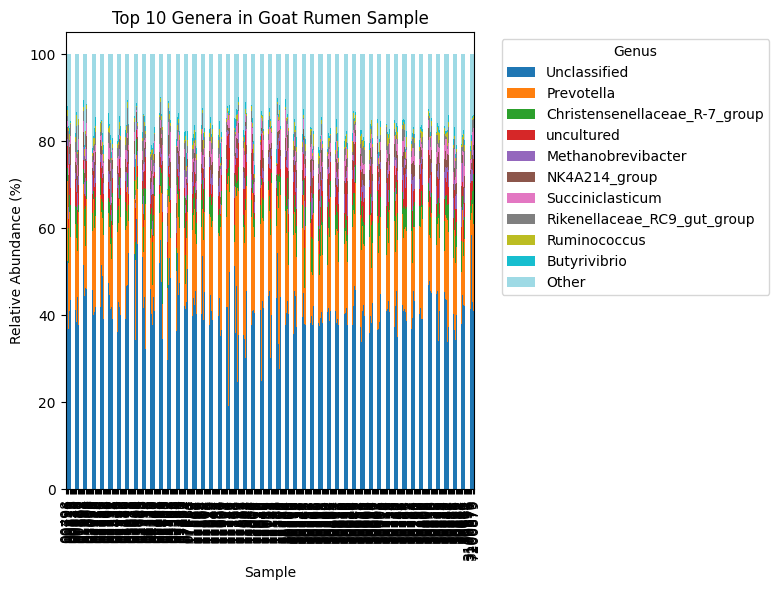

In [10]:
# Get top 10 genera by abundance (mean is redundant if only have one sample)
top_n = 10
top_genera = genus_rel_abundance.mean().sort_values(ascending=False).head(top_n).index

# Subset top genera and add "Other"
plot_df = genus_rel_abundance[top_genera].copy()
plot_df["Other"] = 100 - plot_df.sum(axis=1)

# Plot
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.ylabel('Relative Abundance (%)')
plt.xlabel('Sample')
plt.title(f'Top {top_n} Genera in Goat Rumen Sample')
plt.legend(title='Genus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("genus_relative_abundance.png", dpi=300)  # <- Save as PNG
plt.show()
plt.show()

In [11]:
# Save as csv
output_path = F"{base_dir}/exported/genus_relative_abundance.csv"

genus_rel_abundance.to_csv(output_path)